# Naive Bayes Algorithm

Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as

$$P(class \mid data) = \frac{P(data \mid class) \, P(class)}{P(data)}$$

Where $P(class \mid data)$ is the probability of class given the provided data. Naive Bayes is a classification algorithm for binary (two-class) and multiclass classification problems. It is called Naive Bayes or idiot Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable.

Rather than attempting to calculate the probabilities of each attribute value, they are assumed to be conditionally independent given the class value. This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

## Exercise 1 - Explore the Data

The test problem we will be using is Iris classification. The problem is comprised of 150 observations of iris flowers from three different species. There are 4 measurements of given flowers: sepal length, sepal width, petal length and petal width, all in the same unit of centimeters. The predicted attribute is the species, which is one of setosa, versicolor or virginica.

It is a standard dataset where the species is known for all instances. As such we can split the data into training and test datasets and use the results to evaluate our algorithm implementation. Good classification accuracy on this problem is above 90% correct, typically 96% or better.

You can download the dataset for free from [UCI](https://archive.ics.uci.edu/ml/datasets/Iris), see the resources section for further details.

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv('iris.data', header=None)
iris.columns = ['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'class']
iris.head()

,sep_len,sep_wid,pet_len,pet_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [93]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(iris['class'])
iris['class'] = enc.transform(iris['class'])

In [94]:
iris.head()

,sep_len,sep_wid,pet_len,pet_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [107]:
iris.describe()

,sep_len,sep_wid,pet_len,pet_wid,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


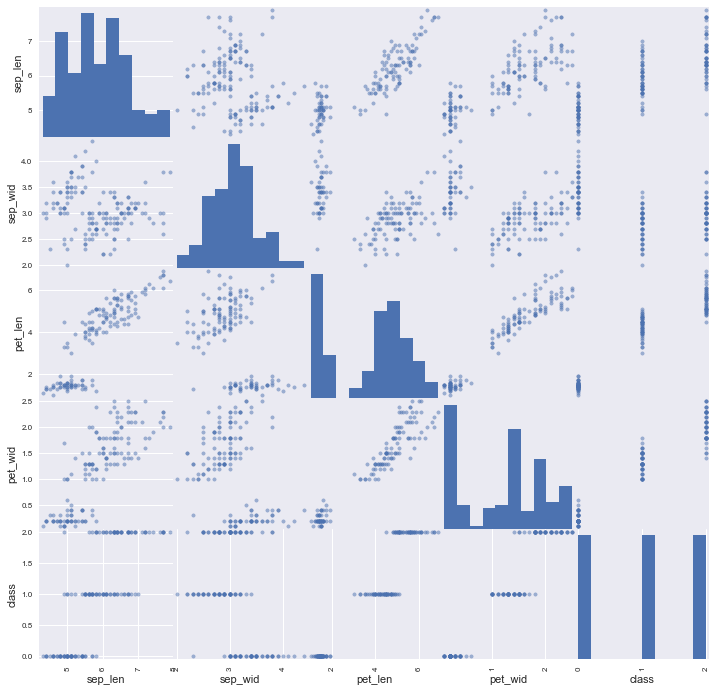

In [95]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(iris, figsize=(12,12));

In [96]:
iris.corr()

,sep_len,sep_wid,pet_len,pet_wid,class
sep_len,1.000000,-0.109369,0.871754,0.817954,0.782561
sep_wid,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
pet_len,0.871754,-0.420516,1.000000,0.962757,0.949043
pet_wid,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


High correlations between sepal length and petal length, sepal length and petal width, and petal length and petal width. Negative correlations between sepal width and the other features.

## Exercise 2 - Build a NaiveBayes Class

The derivation can be [found here on Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The general steps are:
1. Separate By Class
2. Summarize Dataset
3. Summarize Data By Class
4. Generate Gaussian Probability Density Function
5. Class Probabilities

In [97]:
class GaussianNB_(object):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # group training data by class
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        # obtain standard deviation and mean, 4 features and 3 classes
        # np.c_ is similar to zip
        self.model = np.array([np.c_[np.mean(i, axis=0), np.std(i, axis=0)] for i in separated])
        
        return self
    
    def _prob(self, x, mean, std):
        exponent = np.exp(- ((x - mean) ** 2 / (2 * std ** 2))) # Gaussian distribution
        return np.log(exponent / (np.sqrt(2 * np.pi) * std)) # log Gaussian
    
    # obtain log probability of each class
    def predict_log_proba(self, X):
        # x for X loops through each sample
        # second loop for each class
        # third loop for each attribute and apply Gaussian dist. *s to unpack array of mean and std.
        return [[sum(self._prob(i, *s) for s, i in zip(summaries, x)) for summaries in self.model] for x in X]
    
    # call log probability function and pick maximum value
    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)
    
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

## Exercise 3 - Try it out on the Iris Dataset. 

In [98]:
from sklearn.cross_validation import train_test_split

trainSet, testSet = train_test_split(iris, test_size=0.25)

In [99]:
trainData = pd.DataFrame.as_matrix(trainSet[['sep_len', 'sep_wid', 'pet_len', 'pet_wid']])
trainTarget = pd.DataFrame.as_matrix(trainSet['class'])
testData = pd.DataFrame.as_matrix(testSet[['sep_len', 'sep_wid', 'pet_len', 'pet_wid']])
testTarget = pd.DataFrame.as_matrix(testSet['class'])

In [100]:
nb = GaussianNB_().fit(trainData, trainTarget)

In [114]:
def separated(x, y):
    sep = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
    
    return sep

sep = separated(trainData, trainTarget)
sep

[[array([ 4.9,  3. ,  1.4,  0.2]),
  array([ 4.6,  3.1,  1.5,  0.2]),
  array([ 5.4,  3.9,  1.7,  0.4]),
  array([ 5.4,  3.7,  1.5,  0.2]),
  array([ 4.8,  3.4,  1.6,  0.2]),
  array([ 4.3,  3. ,  1.1,  0.1]),
  array([ 5.8,  4. ,  1.2,  0.2]),
  array([ 5.4,  3.9,  1.3,  0.4]),
  array([ 4.8,  3.4,  1.9,  0.2]),
  array([ 5.2,  3.4,  1.4,  0.2]),
  array([ 4.8,  3.1,  1.6,  0.2]),
  array([ 5.5,  4.2,  1.4,  0.2]),
  array([ 4.9,  3.1,  1.5,  0.1]),
  array([ 4.5,  2.3,  1.3,  0.3]),
  array([ 5. ,  3.3,  1.4,  0.2]),
  array([ 7. ,  3.2,  4.7,  1.4]),
  array([ 4.9,  2.4,  3.3,  1. ]),
  array([ 6. ,  2.2,  4. ,  1. ]),
  array([ 5.6,  2.9,  3.6,  1.3]),
  array([ 6.7,  3.1,  4.4,  1.4]),
  array([ 5.6,  3. ,  4.5,  1.5]),
  array([ 5.8,  2.7,  4.1,  1. ]),
  array([ 5.6,  2.5,  3.9,  1.1]),
  array([ 6.8,  2.8,  4.8,  1.4]),
  array([ 5.5,  2.4,  3.7,  1. ]),
  array([ 5.4,  3. ,  4.5,  1.5]),
  array([ 6.1,  3. ,  4.6,  1.4]),
  array([ 5.8,  2.6,  4. ,  1.2]),
  array([ 6.2,  2.9,

In [130]:
model = np.array([np.c_[np.mean(i, axis=0), np.std(i, axis=0)] for i in sep])
model

array([[[ 5.56363636,  0.76349205],
        [ 3.07575758,  0.48619132],
        [ 3.1030303 ,  1.61910653],
        [ 0.88181818,  0.67619907]],

       [[ 5.595     ,  0.79339461],
        [ 2.985     ,  0.40221263],
        [ 3.215     ,  1.64279487],
        [ 0.9725    ,  0.6785969 ]],

       [[ 5.5974359 ,  0.61289024],
        [ 3.17435897,  0.47648174],
        [ 3.16153846,  1.61429756],
        [ 0.89230769,  0.62650214]]])

In [101]:
print(nb.score(trainData, trainTarget))
print(nb.score(testData, testTarget))

0.946428571429
1.0


## Exercise 4 - Check via Statsmodels or Scikit-learn

In [102]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(trainData, trainTarget)
print(classifier.score(trainData, trainTarget))
print(classifier.score(testData, testTarget))

0.946428571429
1.0


Received the same exact output as sklearn.

# Additional Optional Exercises

- Proper documentation for class methods and attributes
- Build with NumPy methods and compare computation time
- Calculate class probabilities as a ratio
- Take the log probabilities
- Update the implementation to support nominal attributes
- Utilize a different density function instead of Gaussian (ie. Multinomial, Bernoulli, Kernel)